### WEEK OF OCT21 HW: 

#### question 1: 

The theoretical simple linear regression model is a linear model, linear line on a graph, that provides us with the linear assosiciation between the outcome and predictor value. Lets look at the charecteristics of a theoretical simeple linear regression model in greater detail. The predictor variable is a numerical value, it could also be seen as the independant value in a math sense, this is the variable that does not depend on anything else, it stands alone. The outcome variable is a continuous numerical value, meaning that it can be an infinite number of real numbers in a given range, this may also be called the dependant variable meaning that it it's outcome has a direct relation to the indepndant value. In a mathematical way of thinking, the slope and intercept coefficients are atributes of the linear regression model that help us define the line of best fit four our model. There is also the error term, this term introduces a random variable with distribution covering the assumptions of our model. The error is also an independant value, as it accounts for a natural variability and is not dependent on our predictor value. All of these attributes come together to create a normal distribution, each attribute coincides with the basic linear equation y = mx + b.  

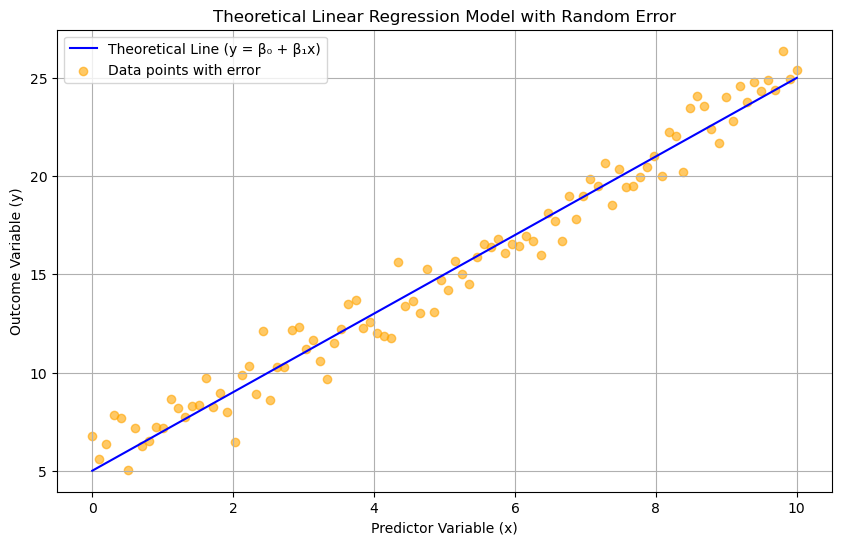

   Predictor (x)  Error (ε)  Outcome (y)
0        0.00000   1.764052     6.764052
1        0.10101   0.400157     5.602177
2        0.20202   0.978738     6.382778
3        0.30303   2.240893     7.846954
4        0.40404   1.867558     7.675639


NameError: name 'fig' is not defined

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parameters of the theoretical model
intercept = 5       # β₀
slope = 2           # β₁
error_mean = 0      # Mean of the error term
error_std = 1       # Standard deviation of the error term

# Generate predictor (independent) variable values
np.random.seed(0)   # For reproducibility
x = np.linspace(0, 10, 100)  # 100 evenly spaced points from 0 to 10

# Generate the error term ε using a normal distribution
error = norm.rvs(loc=error_mean, scale=error_std, size=x.size)

# Calculate the theoretical outcome (dependent) variable values
y = intercept + slope * x + error

# Plot the theoretical linear relationship with the error
plt.figure(figsize=(10, 6))
plt.plot(x, intercept + slope * x, color="blue", label="Theoretical Line (y = β₀ + β₁x)")
plt.scatter(x, y, color="orange", alpha=0.6, label="Data points with error")
plt.xlabel("Predictor Variable (x)")
plt.ylabel("Outcome Variable (y)")
plt.title("Theoretical Linear Regression Model with Random Error")
plt.legend()
plt.grid(True)
plt.show()


# Create a DataFrame with the generated data
data = pd.DataFrame({
    "Predictor (x)": x,
    "Error (ε)": error,
    "Outcome (y)": y
})

# Display the first few rows of the dataset
print(data.head())

# Save the dataset to a CSV file
data.to_csv("theoretical_linear_regression_data.csv", index=False)
fig.show(renderer='png')

#### question 2: 

                            OLS Regression Results                            
Dep. Variable:                outcome   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.970
Method:                 Least Squares   F-statistic:                     3208.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):           1.09e-76
Time:                        15:25:25   Log-Likelihood:                -142.31
No. Observations:                 100   AIC:                             288.6
Df Residuals:                      98   BIC:                             293.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.2085      0.201     25.867      0.0

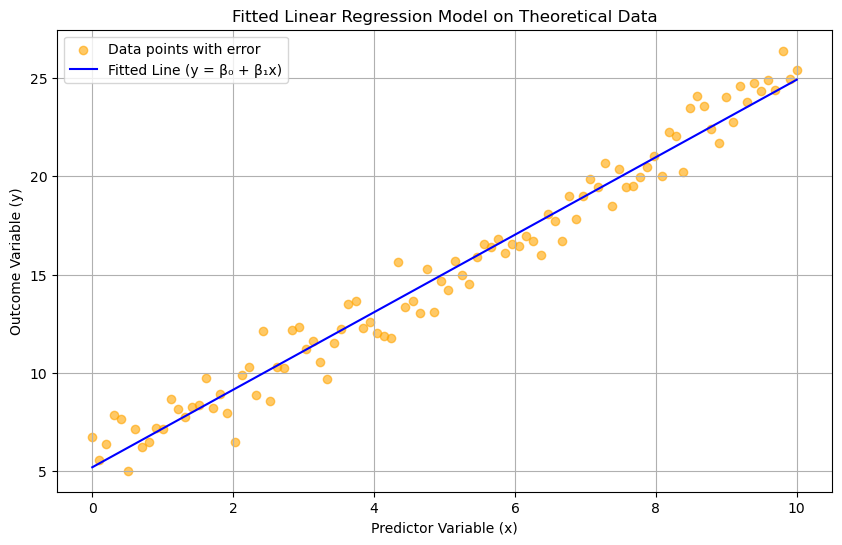

NameError: name 'fig' is not defined

In [16]:
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt


#load the data set from the theortical linear regression done beforehand 
data = pd.read_csv("theoretical_linear_regression_data.csv")

data = data.rename(columns={'Predictor (x)': 'predictor', 'Outcome (y)': 'outcome'})

# Fit a linear regression model using a formula
model = sm.ols(formula='outcome ~ predictor', data=data).fit()

# Print the summary of the model
#this shows us the the estimated intercept and slope 
print(model.summary())

#get the fitted values: predicted y values 
data['Fitted (y)'] = model.fittedvalues

plt.figure(figsize=(10, 6))
plt.scatter(data['predictor'], data['outcome'], color="orange", alpha=0.6, label="Data points with error")
plt.plot(data['predictor'], data['Fitted (y)'], color="blue", label="Fitted Line (y = β₀ + β₁x)")
plt.xlabel("Predictor Variable (x)")
plt.ylabel("Outcome Variable (y)")
plt.title("Fitted Linear Regression Model on Theoretical Data")
plt.legend()
plt.grid(True)
plt.show()
fig.show(renderer='png')

In [8]:
print(data.columns)

Index(['Predictor (x)', 'Error (ε)', 'Outcome (y)'], dtype='object')


#### question 3: 

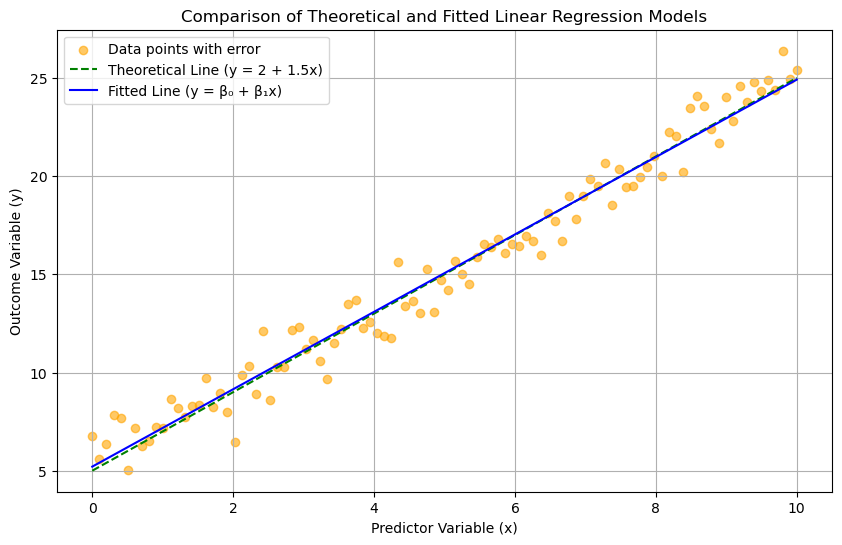

NameError: name 'fig' is not defined

In [18]:
import statsmodels.formula.api as sm
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = pd.read_csv("theoretical_linear_regression_data.csv")

# Rename columns to simpler names
data = data.rename(columns={'Predictor (x)': 'predictor', 'Outcome (y)': 'outcome'})

# Define the theoretical parameters 
intercept_theoretical = 5  
slope_theoretical = 2      

# Calculate the theoretical line using the original predictor values
data['Theoretical (y)'] = intercept_theoretical + slope_theoretical * data['predictor']

# Fit a linear regression model using the simplified column names
model = sm.ols(formula='outcome ~ predictor', data=data).fit()

# Get the fitted values (predicted y values)
data['Fitted (y)'] = model.fittedvalues

# Plot the data points, theoretical line, and fitted line
plt.figure(figsize=(10, 6))
plt.scatter(data['predictor'], data['outcome'], color="orange", alpha=0.6, label="Data points with error")
plt.plot(data['predictor'], data['Theoretical (y)'], color="green", linestyle="--", label="Theoretical Line (y = 2 + 1.5x)")
plt.plot(data['predictor'], data['Fitted (y)'], color="blue", label="Fitted Line (y = β₀ + β₁x)")

# Label axes and add title
plt.xlabel("Predictor Variable (x)")
plt.ylabel("Outcome Variable (y)")
plt.title("Comparison of Theoretical and Fitted Linear Regression Models")
plt.legend()
plt.grid(True)
plt.show()
fig.show(renderer='png')

The main difference in the nature between the theoretical line and the fitted line lies in the error term. The theoretiical line is using values that we have and know/assume for the two paramaters and the intercept, however in order to stimulate the real word and its inpredictability it will add the error term onto its linear equation to account for real world variance. The theoretical line represents what we believe to be the population as a hole, this is where it starts to differ from the fitted line. The fitted line works off of our data form the theoretical line, but it only uses a sample of all of the data from the theoretical line. However, since our fitted line only comes from a sample of the true population there may not be a perfect fit due to the sampling error. This is what we would work with if we do not know the true predictors of our model, unlike the theoretical model where we know our paramaters. The nature of the fitted line is to show a line that best fits our data points but does not show the true relationship of the entire population, like the theoretical line does. 

#### question 4: 

The values for the fitted model are dervied from the theoretical population data of the theoretical line. By doing sampling, to only get a few values not the entire population, we calculate the estimated coefficients. fitted_model.params essentially holds the estimated slope and intercept of our fitted line. Using these coefficients we will then plug in our x values to find our y.

### WEEK OF NOV4 HW

#### question 9:

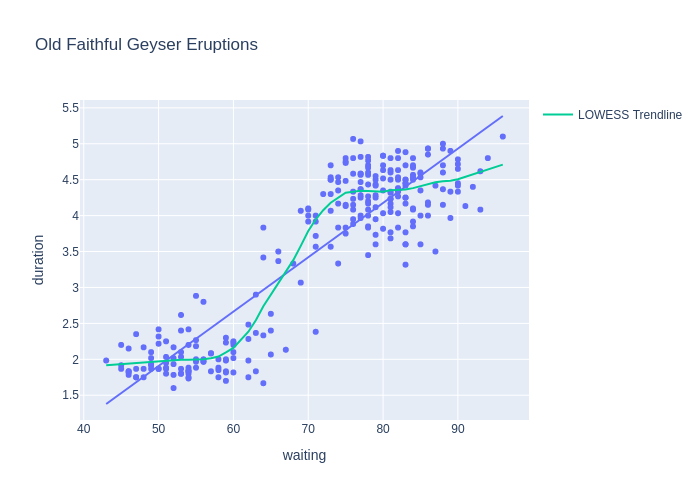

In [2]:
import plotly.express as px
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

# The "Classic" Old Faithful Geyser dataset: ask a ChatBot for more details if desired
old_faithful = sns.load_dataset('geyser')

# Create a scatter plot with a Simple Linear Regression trendline
fig = px.scatter(old_faithful, x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions", 
                 trendline='ols')#'lowess'

# Add a smoothed LOWESS Trendline to the scatter plot
lowess = sm.nonparametric.lowess  # Adjust 'frac' to change "smoothness bandwidth"
smoothed = lowess(old_faithful['duration'], old_faithful['waiting'], frac=0.25)  
smoothed_df = pd.DataFrame(smoothed, columns=['waiting', 'smoothed_duration'])
fig.add_scatter(x=smoothed_df['waiting'], y=smoothed_df['smoothed_duration'], 
                mode='lines', name='LOWESS Trendline')

fig.show(renderer='png')

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
                            OLS Regression Results                            
Dep. Variable:               duration   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     1.410
Date:                Fri, 08 Nov 2024   Prob (F-statistic):              0.238
Time:                        03:38:14   Log-Likelihood:                 2.3238
No. Observations:                  83   AIC:                           -0.6475
Df Residuals:                      81   BIC:                             4.190
Df Model:                           1               

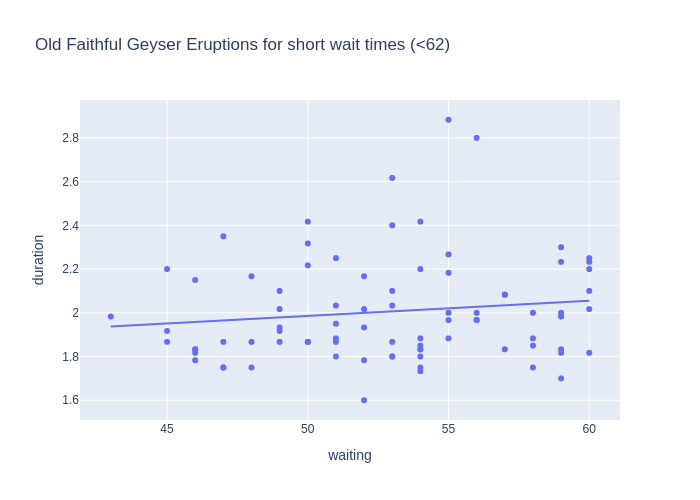

In [6]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

import plotly.express as px
import statsmodels.formula.api as smf

# Assuming you already have your dataset loaded as old_faithful
short_wait_limit = 62  # Example limit
short_wait = old_faithful.waiting < short_wait_limit

# Fit the regression model
model = smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit()

# Print the summary to see the coefficients and p-values
print(model.summary())

# Extract the p-value for the 'waiting' coefficient
p_value = model.pvalues['waiting']
print(f"P-value for 'waiting': {p_value:.4f}")



fig.show(renderer = 'png')

the null hypothesis would be that there is no relationship between wait time and duration. Since the calculated p value is 0.2385 meaning it is greater than 0.1 there is no evidence against the null hypothesis. 

#### question 11

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


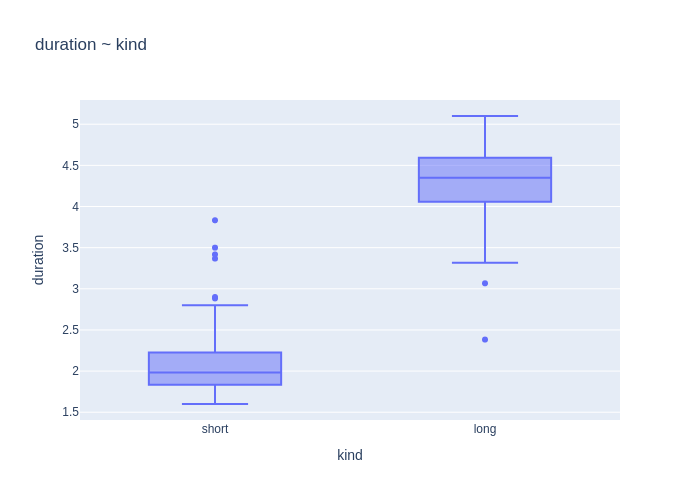

In [9]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') 


The main big difference between this data set and the previous data set is that it works off of indicator values. Indicator values essentially work as a yes or no, it basically uses 0 or 1 to say if it pops up in the short duration or the long duration. Essentially we are usually values that are no longer numerical, whereas the earlier linear models all used complicated formulas to gather data points that were numbers/integers. This essentially shows us a comparison of groups instead of a linear comparison between two whole variables. The new p-value shows us a comparison of the two groups within our data, and now the p-value has a great deal of evidence against the null hypothesis, essentially saying that there is a clear relationship between the wait times and duration of the gyeser. 


### Chatbot Summaries and Links: 

https://chatgpt.com/share/672d98b3-9454-800f-b28d-537c580c4787

1. Understanding Indicator Variables
We explored indicator variables in regression models. These variables are used to represent categories (like "short" and "long" wait times) using binary values (0 or 1).
Indicator variables help compare groups rather than continuous numerical predictors. This contrasts with previous models that relied on numerical values for linear relationships.
2. Modeling the Old Faithful Geyser Data
You were working with the Old Faithful dataset, using simple linear regression to analyze the relationship between duration and waiting time.
Initially, we focused on subsets of the data with shorter wait times (e.g., <62, <64, <66 minutes).
You then explored a new approach by categorizing wait times into "short" (<68) and "long" wait times using an indicator variable.
3. Regression Model with Indicator Variable
We fit a model using:
python
Copy code
smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit()
This model included a categorical variable (kind) indicating whether a wait time is "short" or "long", with "short" as the baseline category.
4. Interpreting the Results to Test the Null Hypothesis
The focus was on assessing whether there’s a significant difference in eruption duration between the "short" and "long" wait time groups.
We discussed how to interpret the regression output, specifically looking at:
The coefficient for the indicator variable (C(kind)[T.long]), which shows the difference in mean duration between the groups.
The p-value associated with this coefficient to assess whether this difference is statistically significant.
A low p-value (<0.05) indicates evidence against the null hypothesis, suggesting a significant difference between the groups.
5. Key Insights:
The theoretical model assumes a known relationship with added error terms to mimic real-world variability.
The fitted model, however, is derived from sampled data points, resulting in estimated coefficients that reflect real-world variability and potential sampling error.
By using an indicator variable model, you were able to shift the analysis from predicting a continuous outcome based on numerical predictors to comparing differences between categories.
This summary covers the core ideas we discussed! Let me know if there are specific areas you’d like to revisit or explore further!